In [274]:
import re
from collections import namedtuple
import matplotlib.pyplot as plt
import pandas as pd
import io
from matplotlib.pyplot import figure

In [305]:
!dir

 Volume in drive C has no label.
 Volume Serial Number is 0446-5F4D

 Directory of c:\Users\camar\Downloads\CAP5768

11/29/2022  05:15 AM    <DIR>          .
11/29/2022  05:15 AM    <DIR>          ..
11/29/2022  04:06 AM    <DIR>          .ipynb_checkpoints
10/13/2022  06:05 PM             2,908 2.5-DataFrames.ipynb
10/13/2022  06:02 PM             3,069 2.6-Files.ipynb
10/13/2022  06:02 PM           352,718 2.7-Python_for_Data_Science.ipynb
10/13/2022  05:16 PM             3,072 5.1-simplePlots.ipynb
10/13/2022  05:16 PM             8,919 5.2-morePlots.ipynb
10/13/2022  05:16 PM             4,094 5.3-MDCPS-Grades-2017.ipynb
10/13/2022  05:16 PM            35,974 5.4-barPlotWithErrorBars.ipynb
10/13/2022  05:17 PM             3,331 6.1-DiscDistr.ipynb
10/13/2022  05:17 PM             4,078 6.2-ContDistr.ipynb
10/13/2022  05:17 PM             3,135 6.3-LawOfLargeNumbers.ipynb
10/13/2022  05:05 PM             4,382 7.1-ScalingNormalization.ipynb
10/13/2022  05:08 PM             3,594 7.2

In [275]:
stocks = ["AAPL", "MSFT", "AMZN", "TSLA", "GOOGL", "GOOG", "NVDA", "BRK.B", "META","UNH" ]

In [276]:
Call = namedtuple('Call', ['index', 'name', 'ratio'])
Put = namedtuple('Put', ['index', 'name', 'ratio'])

In [308]:
with open("logfile.txt", "rt") as F:
    log = F.read()
log[-100:]

'0016  m: 12.425220000000015  baseValue: 9.517969999999998  2022-11-29 07:24:51.036109  11143 seconds'

In [297]:
# buying call deltab: 1.0257443944980111  stock: nvda
cd = r"""
buying call fraction: (\d.\d+)\s+stock\:\s+(\w+)
aDayIndes\s+\d+\s+weekDay (\w+)\s+Date (\d{4}-\d{2}-\d{2})\s+00:00:00
"""
cd = r"""
^buying call fraction\: (\d.\d+)\s+stock\:\s+(\w+)
"""
cd = r"^buying call fraction\: (\d.\d+)\s+stock\:\s+([\w\.]+)"

callsre = re.findall(cd, log, flags=re.M)
print(len(callsre))

9


In [298]:
putsre = re.findall(r'buying put fraction\: (-\d\.\d+)\s+stock\:\s+(\w+)', log, flags=re.M)
print(len(putsre))

4


In [299]:
calls = []
for call in callsre:
    ratio = call[0]
    stock = call[1].upper()
    calls.append(Call(stocks.index(stock), stock, ratio))
    print(stock)
    print(ratio)

GOOG
0.05597574220580266
UNH
0.07876569626573582
GOOG
0.05597574220580266
UNH
0.07876569626573582
BRK.B
0.03960088754501291
UNH
0.08025847177881922
BRK.B
0.03960088754501291
NVDA
0.05424301151630015
NVDA
0.05424301151630015


In [300]:
puts = []
for put in putsre:
    ratio = put[0]
    stock = put[1].upper()
    puts.append(Put(stocks.index(stock), stock, ratio))
    print(stock)
    print(ratio)    

UNH
-0.08709502767081972
UNH
-0.09351293910667745
UNH
-0.09351293910667745
UNH
-0.09351293910667745


In [203]:
print(calls)

[Call(index=1, name='MSFT', ratio='0.05016684169814885'), Call(index=1, name='MSFT', ratio='0.05016684169814885')]


In [204]:

# Friday option expire 0th td
# call sb.dataframe.iloc[-] Volume               0.211958
# Date      2022-10-21 00:00:00
# Close                 0.12466
# Name: 24, dtype: object
# td SevenDay(index=7, count=360, price=0.1196, dayIndex=1228, cost=0.9568, call=True)
# call net = 0.8647999999999983


In [301]:
s  = r"""Friday option expire \dth td
(put|call) sb.dataframe.iloc\[\-1?\] Volume\s+\d\.\d+
Date\s+(\d{4}-\d{2}-\d{2}) 00\:00\:00
Close\s+(\d\.\d+)
Name: \d+, dtype: object
td SevenDay\(index=(\d), count=(\d+), price=(\d\.\d+), predictedPrice=(\d\.\d+), dayIndex=(\d+), cost=(\d\.\d+), call=(True|False)\)
(put|call)\s+((net\s*=\s+(-?\d+\.\d+))|(failed\,\s+loss=\s+(\d\.\d+)))"""

In [302]:
s

'Friday option expire \\dth td\n(put|call) sb.dataframe.iloc\\[\\-1?\\] Volume\\s+\\d\\.\\d+\nDate\\s+(\\d{4}-\\d{2}-\\d{2}) 00\\:00\\:00\nClose\\s+(\\d\\.\\d+)\nName: \\d+, dtype: object\ntd SevenDay\\(index=(\\d), count=(\\d+), price=(\\d\\.\\d+), predictedPrice=(\\d\\.\\d+), dayIndex=(\\d+), cost=(\\d\\.\\d+), call=(True|False)\\)\n(put|call)\\s+((net\\s*=\\s+(-?\\d+\\.\\d+))|(failed\\,\\s+loss=\\s+(\\d\\.\\d+)))'

In [303]:
pat = re.compile(s, re.M)

In [304]:
results = re.findall(pat, log)
print(len(results))

10


In [209]:
print(results[0])

('put', '2022-10-21', '0.10113', '3', '45', '0.09906000000000001', '0.09615224', '1228', '0.09906000000000001', 'False', 'put', 'failed, loss= 0.09906000000000001', '', '', 'failed, loss= 0.09906000000000001', '0.09906000000000001')


In [210]:
for result in results:
    print(result)

('put', '2022-10-21', '0.10113', '3', '45', '0.09906000000000001', '0.09615224', '1228', '0.09906000000000001', 'False', 'put', 'failed, loss= 0.09906000000000001', '', '', 'failed, loss= 0.09906000000000001', '0.09906000000000001')
('put', '2022-10-21', '0.14727', '1', '45', '0.14299', '0.13778895', '1228', '0.14299', 'False', 'put', 'failed, loss= 0.14299', '', '', 'failed, loss= 0.14299', '0.14299')
('put', '2022-10-21', '0.13001', '6', '45', '0.13029', '0.12509628', '1228', '0.13029', 'False', 'put', 'net =  -0.11768999999999988', 'net =  -0.11768999999999988', '-0.11768999999999988', '', '')
('call', '2022-10-21', '0.24212', '2', '45', '0.23424', '0.24599108', '1228', '0.23424', 'True', 'call', 'net = 0.12035999999999991', 'net = 0.12035999999999991', '0.12035999999999991', '', '')
('put', '2022-10-21', '0.10113', '3', '45', '0.09906000000000001', '0.09615224', '1228', '0.09906000000000001', 'False', 'put', 'failed, loss= 0.09906000000000001', '', '', 'failed, loss= 0.099060000000

In [261]:
df = pd.DataFrame(results, columns=['type', 'date', 'current price', 'index', 'count', 'price', 'predicted price',
                                   'dayIndex', 'cost', 'call', 'A','net', 'B', 'C', 'D', 'E' ])
df.drop(['A','B', 'C', 'D', 'E'], axis=1, inplace=True)

In [265]:
df.head()

,type,date,current price,index,count,price,predicted price,dayIndex,cost,call,net
0,put,2022-10-21,0.10113,3,45,0.09906000000000001,0.09615224,1228,0.09906000000000001,False,-0.09906
1,put,2022-10-21,0.14727,1,45,0.14299,0.13778895,1228,0.14299,False,-0.14299
2,put,2022-10-21,0.13001,6,45,0.13029,0.12509628,1228,0.13029,False,-0.11769
3,call,2022-10-21,0.24212,2,45,0.23424,0.24599108,1228,0.23424,True,0.12036
4,put,2022-10-21,0.10113,3,45,0.09906000000000001,0.09615224,1228,0.09906000000000001,False,-0.09906


In [224]:
print(re.search(r'failed\, loss\s*=\s*(-?\d\.\d+)', 'failed, loss= 0.0990600')[1])

0.0990600


In [252]:
pat = re.compile(r'(failed\, loss|net)\s*=\s*(-?\d\.\d+)')
print(pat)
m = re.search(pat,'net = -0.117689999')
print(float(m[2]))

re.compile('(failed\\, loss|net)\\s*=\\s*(-?\\d\\.\\d+)')
-0.117689999


In [263]:
def netMap(net):
#     print('net',net)
    m = re.search(pat, net)
    if m[1] == "failed, loss":
        return -float(m[2])
    return float(m[2])

In [264]:
df.net = df.net.map(netMap)

In [270]:
df.net.sum()

-0.6592600000000008

In [186]:
df['date'] = pd.to_datetime(df['date'])

In [273]:
print(df.loc[df.type == 'put', 'net'].sum())

-0.9369800000000013


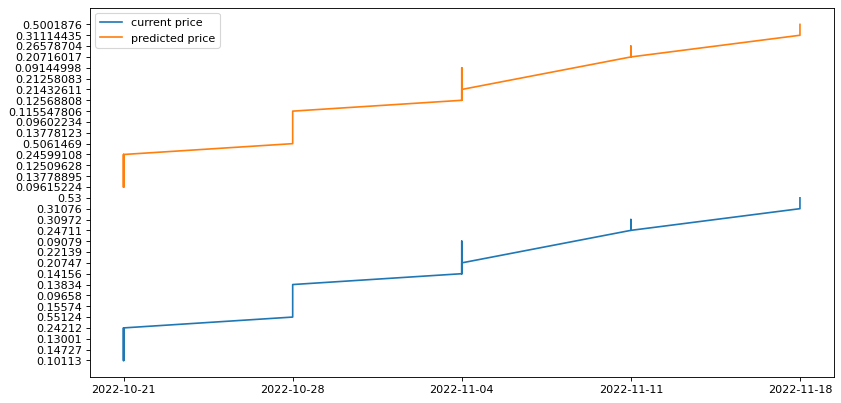

In [212]:
figure(figsize=(12, 6), dpi=80)
plt.plot(df.date, df['current price'], label='current price')
plt.plot(df.date, df['predicted price'], label='predicted price')
plt.legend()
plt.show()